In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from matplotlib.ticker import ScalarFormatter
from scipy.interpolate import CubicSpline

In [94]:
f =  ScalarFormatter(useOffset=False, useMathText=True)
f.set_scientific(True)
f.set_powerlimits((0, 0))

def sci_notation(x):
    if x == 0:
        return "0"
    else:
        formatted = f"{x:.2e}"  # Converte in notazione scientifica
        coefficient, exponent = formatted.split('e')
        exponent = int(exponent)  # Converti l'esponente a intero
        return f"${coefficient} \\times 10^{{{exponent}}}$"  # Notazione LaTeX

In [95]:
K = 1.380649e-23 # J / K
vc = 299792458 #m / s
h_pl = 6.62607015e-34 #J*s
T = 2.72548 #K

In [96]:
folder = 'outputs/'
   
file_path = os.path.join(folder, "Imu_corrections.dat")
op = pd.read_csv(file_path, skiprows=0, delimiter=' ', header=None)


z = op.iloc[:, 0].values

Imu = op.iloc[:, 1].values

xdc = op.iloc[:, 2].values

xdcbr = op.iloc[:, 3].values

xcorr = op.iloc[:, 4].values

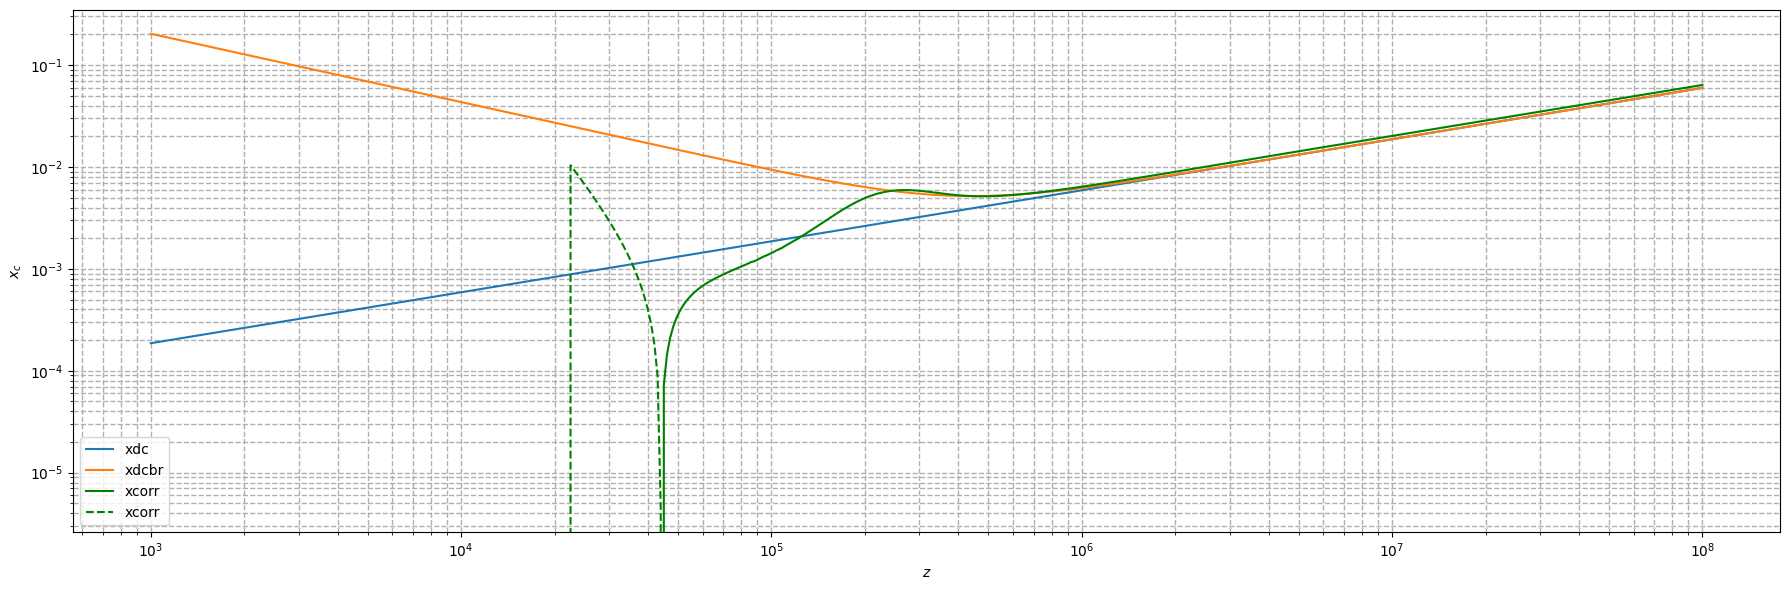

In [97]:

# Crea la figura e i subplots (2 righe e 1 colonna)
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
#fig.suptitle(f"Late times ")

#ax.plot(z, Imu, label= "Imu")
ax.plot(z, xdc, label= "xdc")
ax.plot(z, xdcbr, label= "xdcbr")
ax.plot(z, xcorr, label= "xcorr", color = "green")
ax.plot(z, -xcorr, label= "xcorr", color= "green", linestyle= "dashed")
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim([1e+0, 5e+3])
#ax.set_ylabel("$\Delta I_{N}$ [Jy/sr]")
ax.set_ylabel("$x_c$")
ax.set_xlabel("$z$")
#ax1.set_title("All $\Delta$ I_N curves")
ax.grid(True, which = 'both',  linestyle='--', linewidth=1)
ax.legend()

#ax.yaxis.set_major_formatter(ScalarFormatter())    
#ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
#ax2.yaxis.set_major_formatter(ScalarFormatter())
#ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
# Aggiusta il layout
plt.tight_layout()
plt.show()

In [98]:
folder = 'outputs/'
   
file_path = os.path.join(folder, "dlnJbb_dlnz.dat")
op = pd.read_csv(file_path, skiprows=2, delimiter=' ', header=None)


lnz = op.iloc[:, 0].values
deriva = op.iloc[:, 1].to_numpy()


In [99]:
file_path = os.path.join(folder, "Jbb_input.dat")
op = pd.read_csv(file_path, skiprows=2, delimiter=' ', header=None)


lnz_1 = op.iloc[:, 0].values
Jbb = op.iloc[:, 1].to_numpy()

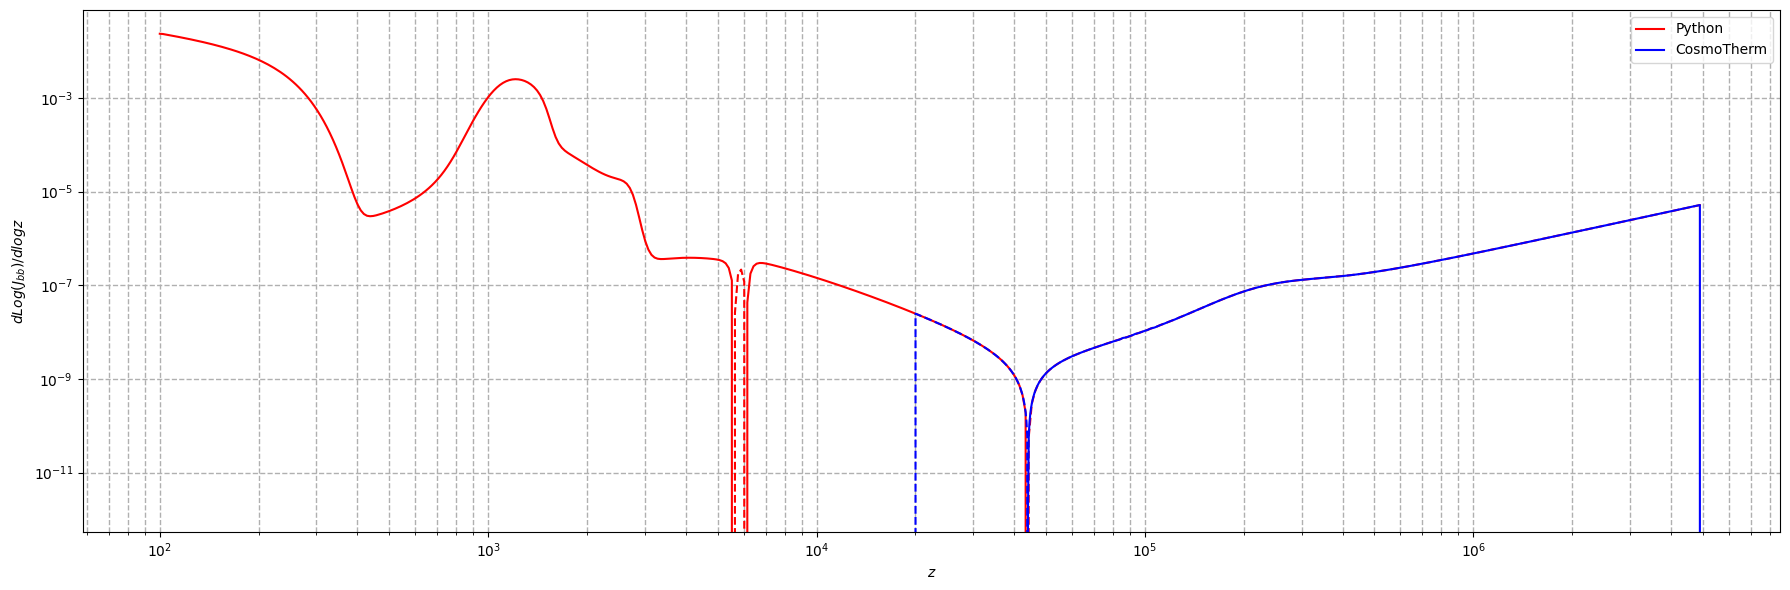

In [100]:
# Crea la figura e i subplots (2 righe e 1 colonna)
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
#fig.suptitle(f"Late times ")

ax.plot(lnz_1, np.gradient(np.log(Jbb), lnz_1), label= "Python", color = "red")
ax.plot(lnz_1, -np.gradient(np.log(Jbb), lnz_1), color= "red", linestyle = "dashed")

ax.plot(lnz, deriva, label= "CosmoTherm", color = "blue")
ax.plot(lnz, -deriva, color= "blue", linestyle = "dashed")



ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim([1e+0, 5e+3])
#ax.set_ylabel("$\Delta I_{N}$ [Jy/sr]")
ax.set_ylabel("$dLog(J_{bb})/dlogz$")
ax.set_xlabel("$z$")
#ax1.set_title("All $\Delta$ I_N curves")
ax.grid(True, which = 'both',  linestyle='--', linewidth=1)
ax.legend()

#ax.yaxis.set_major_formatter(ScalarFormatter())    
#ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
#ax2.yaxis.set_major_formatter(ScalarFormatter())
#ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
# Aggiusta il layout
plt.tight_layout()
plt.show()

In [101]:
file_path = os.path.join(folder, "Jbb.dat")
op = pd.read_csv(file_path, skiprows=2, delimiter=' ', header=None)


lnz = op.iloc[:, 0].values
lnJbb_out = op.iloc[:, 1].to_numpy()
Jbb_out = op.iloc[:, 2].to_numpy()


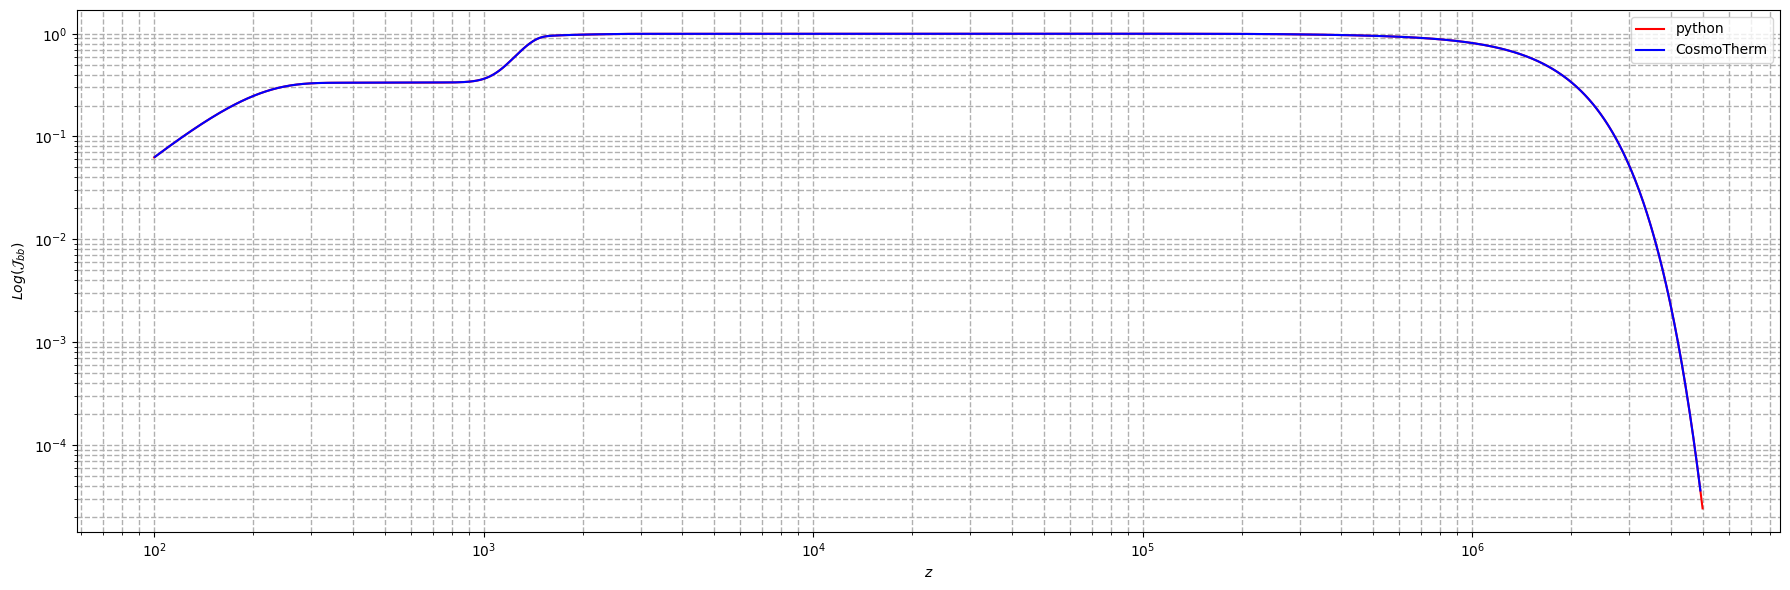

In [102]:
# Crea la figura e i subplots (2 righe e 1 colonna)
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
#fig.suptitle(" ")

ax.plot(lnz_1, Jbb, label= "python",color = "red")
ax.plot(lnz_1, -Jbb,color = "red", linestyle = "dashed")

ax.plot(lnz, Jbb_out, label= "CosmoTherm",color = "blue")
ax.plot(lnz, -Jbb_out ,color = "blue", linestyle = "dashed")


ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim([1e+0, 5e+3])
#ax.set_ylabel("$\Delta I_{N}$ [Jy/sr]")
ax.set_ylabel("$Log(\mathcal{J}_{bb})$")
ax.set_xlabel("$z$")
#ax1.set_title("All $\Delta$ I_N curves")
ax.grid(True, which = 'both',  linestyle='--', linewidth=1)
ax.legend()

#ax.yaxis.set_major_formatter(ScalarFormatter())    
#ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
#ax2.yaxis.set_major_formatter(ScalarFormatter())
#ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
# Aggiusta il layout
plt.tight_layout()
plt.show()

In [103]:
file_path = os.path.join(folder, "all_info_xc_Imu_Jbb_treatment.dat")
op = pd.read_csv(file_path, skiprows=2, delimiter=' ', header=None)


lnz = op.iloc[:, 0].values
Imu_out = op.iloc[:, 1].to_numpy()
x_dc_out= op.iloc[:, 2].to_numpy()
x_dcbr_out= op.iloc[:, 3].to_numpy()
xc_out = op.iloc[:, 4].to_numpy()

In [104]:
file_path = os.path.join(folder, "all_info_xc_Imu_Jbb_treatment_ck4.dat")
op = pd.read_csv(file_path, skiprows=2, delimiter=' ', header=None)


lnz_ck4 = op.iloc[:, 0].values
Imu_outck4 = op.iloc[:, 1].to_numpy()


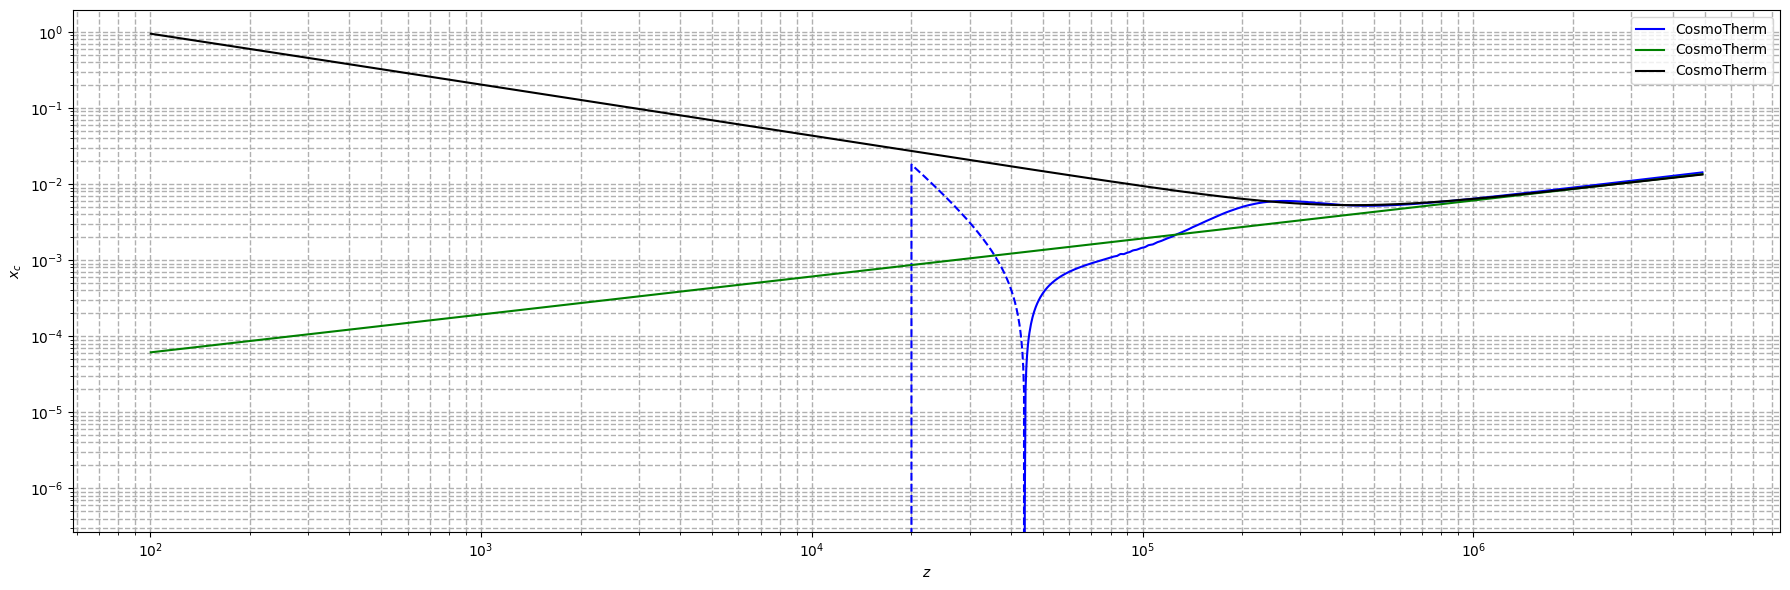

In [105]:
# Crea la figura e i subplots (2 righe e 1 colonna)
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
#fig.suptitle(" ")

#ax.plot(z, xcorr, label= "effective", color = "green")
#ax.plot(z, -xcorr, color= "green", linestyle= "dashed")

ax.plot(lnz, xc_out, label= "CosmoTherm",color = "blue")
ax.plot(lnz, -xc_out ,color = "blue", linestyle = "dashed")

ax.plot(lnz, x_dc_out, label= "CosmoTherm",color = "green")
ax.plot(lnz, -x_dc_out ,color = "green", linestyle = "dashed")

ax.plot(lnz, x_dcbr_out, label= "CosmoTherm",color = "black")
ax.plot(lnz, -x_dcbr_out ,color = "black", linestyle = "dashed")


ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim([1e+0, 5e+3])
#ax.set_ylabel("$\Delta I_{N}$ [Jy/sr]")
ax.set_ylabel("$x_c$")
ax.set_xlabel("$z$")
#ax1.set_title("All $\Delta$ I_N curves")
ax.grid(True, which = 'both',  linestyle='--', linewidth=1)
ax.legend()

#ax.yaxis.set_major_formatter(ScalarFormatter())    
#ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
#ax2.yaxis.set_major_formatter(ScalarFormatter())
#ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
# Aggiusta il layout
plt.tight_layout()
plt.show()

In [107]:
len(Imu_out)

2000

In [108]:
Imu_outcut = Imu_out[lnz>1e5]
lnzcut = lnz[lnz>1e5]

Imu_outck4cut = Imu_outck4[lnz_ck4>1e5]
#lnz = lnz[lnz>5e5]

In [112]:
Imu_outck4cut

array([], dtype=float64)

ValueError: operands could not be broadcast together with shapes (722,) (0,) 

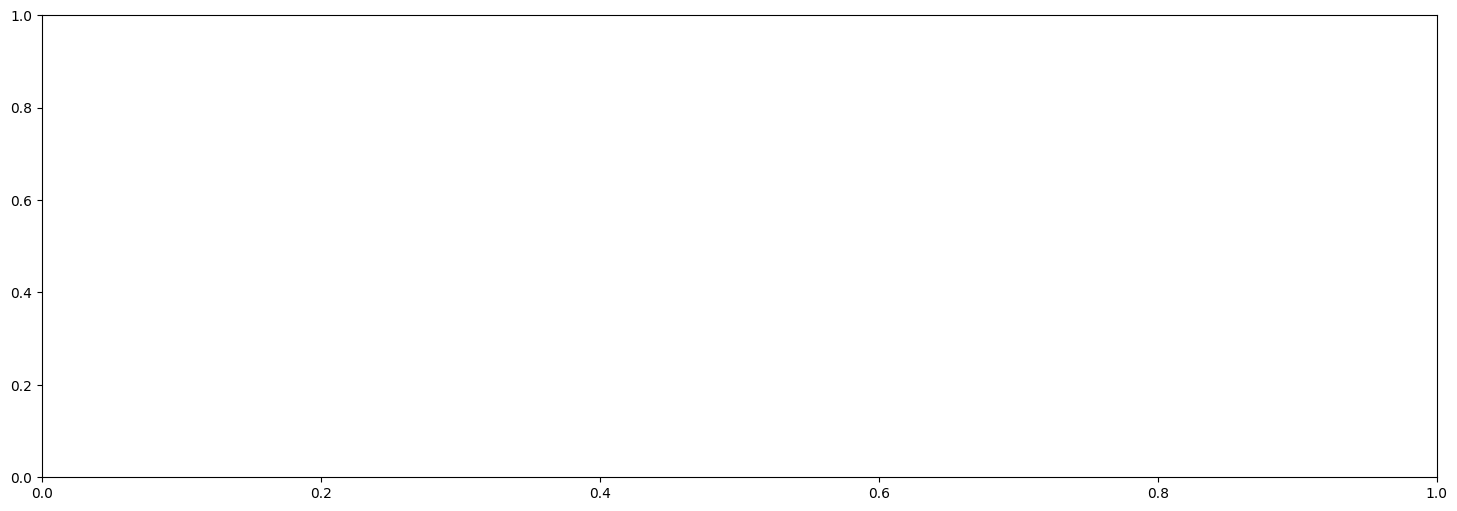

In [110]:
# Crea la figura e i subplots (2 righe e 1 colonna)
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
#fig.suptitle(" ")

#ax.plot(z, Imu, label= "effective", color = "green")
#ax.plot(z, -Imu, color= "green", linestyle= "dashed")

ax.plot(lnzcut, Imu_outcut/Imu_outck4cut-1, label= "CosmoTherm",color = "blue")
ax.plot(lnzcut, -Imu_outcut/Imu_outck4cut+1 ,color = "blue", linestyle = "dashed")

#ax.plot(lnz_ck4, Imu_outck4, label= "Ck4",color = "pink")
#ax.plot(lnz_ck4, -Imu_outck4 ,color = "pink", linestyle = "dashed")

ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim([1e+0, 5e+3])
#ax.set_ylabel("$\Delta I_{N}$ [Jy/sr]")
ax.set_ylabel("$Imu$")
ax.set_xlabel("$z$")
#ax1.set_title("All $\Delta$ I_N curves")
ax.grid(True, which = 'both',  linestyle='--', linewidth=1)
ax.legend()

#ax.yaxis.set_major_formatter(ScalarFormatter())    
#ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
#ax2.yaxis.set_major_formatter(ScalarFormatter())
#ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
# Aggiusta il layout
plt.tight_layout()
plt.show()

In [ ]:
Imu_1 = CubicSpline(z, Imu) 
Imu_2 = CubicSpline(lnz, Imu_out)

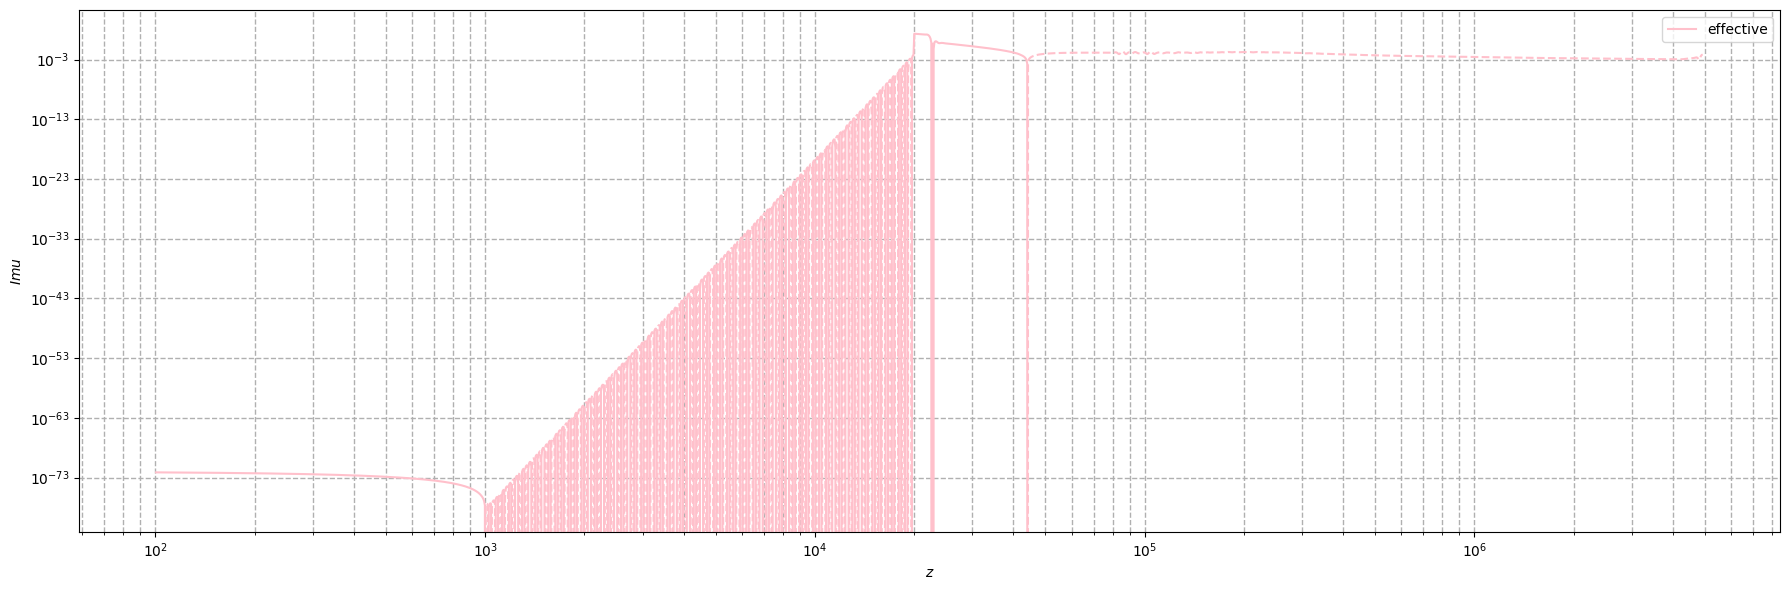

In [ ]:
# Crea la figura e i subplots (2 righe e 1 colonna)
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
#fig.suptitle(" ")

ax.plot(lnz, Imu_1(lnz)-Imu_2(lnz), label= "effective", color = "pink")
ax.plot(lnz, -Imu_1(lnz)+Imu_2(lnz), color = "pink",linestyle= "dashed")
#ax.plot(z, Imu, color= "green", linestyle= "dashed")

#ax.plot(lnz, Imu_out, label= "CosmoTherm",color = "blue")
#ax.plot(lnz, -Imu_out ,color = "blue", linestyle = "dashed")


ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim([1e+0, 5e+3])
#ax.set_ylabel("$\Delta I_{N}$ [Jy/sr]")
ax.set_ylabel("$Imu$")
ax.set_xlabel("$z$")
#ax1.set_title("All $\Delta$ I_N curves")
ax.grid(True, which = 'both',  linestyle='--', linewidth=1)
ax.legend()

#ax.yaxis.set_major_formatter(ScalarFormatter())    
#ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
#ax2.yaxis.set_major_formatter(ScalarFormatter())
#ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
# Aggiusta il layout
plt.tight_layout()
plt.show()